In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pwd

'C:\\Users\\User\\flight fare'

In [3]:
Flight = pd.read_csv('Flight_Fare.csv')
Flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
Flight.shape


(10683, 11)

In [9]:
Flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
Flight['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [13]:
Flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
Flight.dropna(inplace=True)
Flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
Flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
Flight['Journey_Day'] = pd.to_datetime(Flight.Date_of_Journey, format = '%d/%m/%Y').dt.day
Flight['Journey_Month'] = pd.to_datetime(Flight.Date_of_Journey, format ='%d/%m/%Y').dt.month
Flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
Flight['Dep_hour'] = pd.to_datetime(Flight.Dep_Time).dt.hour
Flight['Dep_Minute'] = pd.to_datetime(Flight.Dep_Time).dt.minute
Flight.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2056\2500367423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight['Dep_hour'] = pd.to_datetime(Flight.Dep_Time).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_2056\2500367423.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight['Dep_Minute'] = pd.to_datetime(Flight.Dep_Time).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
Flight['Arrival_hour'] = pd.to_datetime(Flight.Arrival_Time).dt.hour
Flight['Arrival_Minute'] = pd.to_datetime(Flight.Arrival_Time).dt.minute
Flight.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2056\4092959883.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight['Arrival_hour'] = pd.to_datetime(Flight.Arrival_Time).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_2056\4092959883.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight['Arrival_Minute'] = pd.to_datetime(Flight.Arrival_Time).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
Flight.drop(columns=['Dep_Time','Date_of_Journey'],inplace=True)

In [27]:
Flight.drop(columns='Arrival_Time',inplace=True)

In [29]:
Flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
# Assuming Flight.Duration is a pandas series
duration = list(Flight.Duration)

# Normalize durations to include both hours and minutes
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

# Initialize lists to store hours and minutes
duration_hour = []
duration_minute = []

# Extract hours and minutes
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split('h')[0].strip()))
    duration_minute.append(int(duration[i].split('h')[1].split('m')[0].strip()))

In [33]:
Flight['Duration_hour'] = duration_hour
Flight['Duration_minute'] = duration_minute

In [35]:
Flight.drop(columns='Duration',inplace=True)

In [37]:
Flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [39]:
Flight['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [41]:
Airline = Flight['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [43]:
Flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

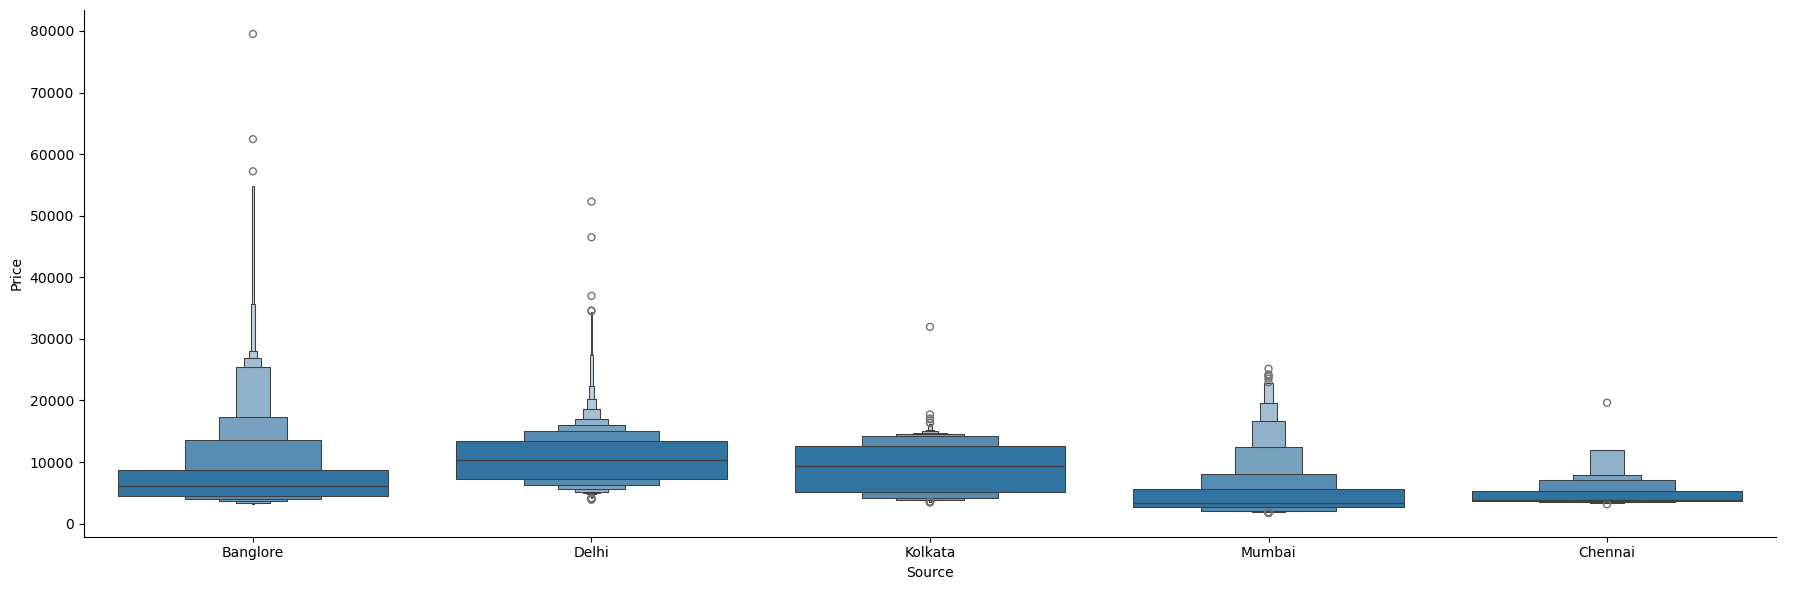

In [45]:
sns.catplot(y='Price' , x='Source' , data= Flight.sort_values('Price',ascending=False), kind='boxen' , height=6, aspect=3)

In [46]:
Flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [47]:
source = Flight[['Source']]
source = pd.get_dummies(source , drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [51]:
Flight['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [53]:
Destination = Flight[['Destination']]
Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [55]:
Flight['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [57]:
Flight.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [59]:
Flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [61]:
Flight['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [63]:
Flight.replace({ 'non-stop':0 , '1 stop': 1 , '2 stop': 2 , '3 stop':3, '4 stop':4} , inplace=True)

In [65]:
Flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [67]:
Flight=pd.concat([Flight,Airline,source,Destination] , axis=1)

In [69]:
Flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [71]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [73]:
Flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [75]:
Flight.drop(columns=['Airline','Source','Destination'],inplace=True)

In [77]:
Flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2 stops,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2 stops,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [79]:
Flight.shape

(10682, 30)

#### Test Data

In [82]:
Flight_test=pd.read_csv('Flight_Fare.csv')

In [84]:
Flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [86]:
Flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [88]:
import pandas as pd

# Load your dataset
# Replace 'path_to_your_file.csv' with the actual path to your dataset
# Flight_test = pd.read_csv('path_to_your_file.csv')

print("_" * 50)
print("Shape")
print(Flight_test.shape)

print("_" * 50)
print("Info")
print(Flight_test.info())

# Debug: Print all column names to verify the existence of 'Duration'
print("_" * 50)
print("Columns in Dataset:")
print(Flight_test.columns)

# Check and process 'Duration' only if it exists
if 'Duration' in Flight_test.columns:
    print("_" * 50)
    print("Duration count values")
    print(Flight_test['Duration'].value_counts())
else:
    print("_" * 50)
    print("Error: 'Duration' column not found in the dataset")

print("_" * 50)
print("Check null values")
print(Flight_test.isnull().sum())

print("_" * 50)
print("Drop null values rows")
Flight_test.dropna(inplace=True)

print("_" * 50)
print("Check null values")
print(Flight_test.isnull().sum())

# Check if 'Date_of_Journey' exists before processing
if 'Date_of_Journey' in Flight_test.columns:
    print("_" * 50)
    print("Fetch journey day and month from Date_of_Journey")
    Flight_test['Journey_Day'] = pd.to_datetime(Flight_test['Date_of_Journey'], format='%d/%m/%Y').dt.day
    Flight_test['Journey_Month'] = pd.to_datetime(Flight_test['Date_of_Journey'], format='%d/%m/%Y').dt.month
else:
    print("_" * 50)
    print("Error: 'Date_of_Journey' column not found")

print(Flight_test.head())

# Proceed with processing other columns conditionally as well
# Check for 'Dep_Time', 'Arrival_Time', and others similarly


__________________________________________________
Shape
(10683, 11)
__________________________________________________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
__________________________________________________
Columns in Dataset:
Index(['Airline', 'Date_of_Journey', 'Source', 'Dest

In [92]:
import pandas as pd

# Load your dataset
# Flight_test = pd.read_csv('path_to_your_file.csv')

print("_" * 50)
print("Shape")
print(Flight_test.shape)

print("_" * 50)
print("Info")
print(Flight_test.info())

print("_" * 50)
print("Duration count values")
# Ensure you check value_counts before modifying the Duration column
if 'Duration_Hour' in Flight_test.columns and 'Duration_Minute' in Flight_test.columns:
    print(Flight_test['Duration_Hour'].value_counts())
    print(Flight_test['Duration_Minute'].value_counts())
else:
    print("Duration_Hour and/or Duration_Minute columns not found.")

print("_" * 50)
print("Check null values")
print(Flight_test.isnull().sum())

print("_" * 50)
print("Drop null values rows")
Flight_test.dropna(inplace=True)

print("_" * 50)
print("Check null values after dropping")
print(Flight_test.isnull().sum())

# Ensure Journey_Day and Journey_Month already exist and are numeric
if 'Journey_Day' in Flight_test.columns and 'Journey_Month' in Flight_test.columns:
    print("_" * 50)
    print("Journey_Day and Journey_Month columns are numeric and ready.")
else:
    print("_" * 50)
    print("Error: Journey_Day and Journey_Month columns not found or incorrectly formatted.")

# Fetch Departure hours & minutes from Dep_Time
if 'Dep_Time' in Flight_test.columns:
    print("_" * 50)
    print("Fetch Departure hours & minutes from Dep_Time")
    Flight_test['Dep_hour'] = pd.to_datetime(Flight_test['Dep_Time']).dt.hour
    Flight_test['Dep_Minute'] = pd.to_datetime(Flight_test['Dep_Time']).dt.minute
else:
    print("Error: Dep_Time column not found.")
print(Flight_test.head())

# Drop Dep_Time column
if 'Dep_Time' in Flight_test.columns:
    Flight_test.drop(columns=['Dep_Time'], inplace=True)

# Fetch arrival hours and minutes from Arrival_Time
if 'Arrival_Time' in Flight_test.columns:
    print("_" * 50)
    print("Fetch arrival hours and minutes from Arrival_Time")
    Flight_test['Arrival_hour'] = pd.to_datetime(Flight_test['Arrival_Time']).dt.hour
    Flight_test['Arrival_Minute'] = pd.to_datetime(Flight_test['Arrival_Time']).dt.minute
else:
    print("Error: Arrival_Time column not found.")
print(Flight_test.head())

# Fetch hours and minutes from Duration
if 'Duration' in Flight_test.columns:
    print("_" * 50)
    print("Fetch hours and minutes from Duration")
    duration = list(Flight_test['Duration'])

    for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            if 'h' in duration[i]:
                duration[i] = duration[i] + ' 0m'
            else:
                duration[i] = '0h ' + duration[i]

    duration_hour = []
    duration_minute = []

    for i in range(len(duration)):
        duration_hour.append(int(duration[i].split(sep='h')[0]))
        duration_minute.append(int(duration[i].split(sep='h')[1].split(sep='m')[0]))

    Flight_test['Duration_Hour'] = duration_hour
    Flight_test['Duration_Minute'] = duration_minute

    # Drop the original Duration column if not needed
    Flight_test.drop(columns=['Duration'], inplace=True)
else:
    print("Error: Duration column not found.")

print("_" * 50)
print("Dataset head after processing:")
print(Flight_test.head())


__________________________________________________
Shape
(10682, 17)
__________________________________________________
Info
<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int32 
 10  Journey_Month    10682 non-null  int32 
 11  Dep_hour         10682 non-null  int32 
 12  Dep_Minute       10682 non-null  int32 
 13  Arrival_hour     10682 non-null  int32 
 14  Arrival_Minute   10682 non-null  int32 
 15  D

C:\Users\User\AppData\Local\Temp\ipykernel_2056\1784227594.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight_test['Arrival_hour'] = pd.to_datetime(Flight_test['Arrival_Time']).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_2056\1784227594.py:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Flight_test['Arrival_Minute'] = pd.to_datetime(Flight_test['Arrival_Time']).dt.minute


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

   Arrival_Time Total_Stops Additional_Info  Price  Journey_Day  \
0  01:10 22 Mar    non-stop         No info   3897           24   
1         13:15     2 stops         No info   7662            1   
2  04:25 10 Jun     2 stops         No info  13882            9   
3         23:30      1 stop         No info   6218           12   
4         21:35      1 stop         No info  13302            1   

   Journey_Month  Dep_hour  Dep_Minute  Arrival_hour  Arrival_Minute  \
0              3        22          20            

In [94]:
print(Flight_test.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_Minute',
       'Arrival_hour', 'Arrival_Minute', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')


In [96]:
Flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [98]:
Flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2 stops,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2 stops,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


#### Feature Selection

In [101]:
Flight.shape,Flight_test.shape


((10682, 30), (10682, 17))

In [103]:
x=Flight.drop(columns='Price',axis=1)
y=Flight['Price']
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hour,Duration_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2 stops,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2 stops,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [105]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

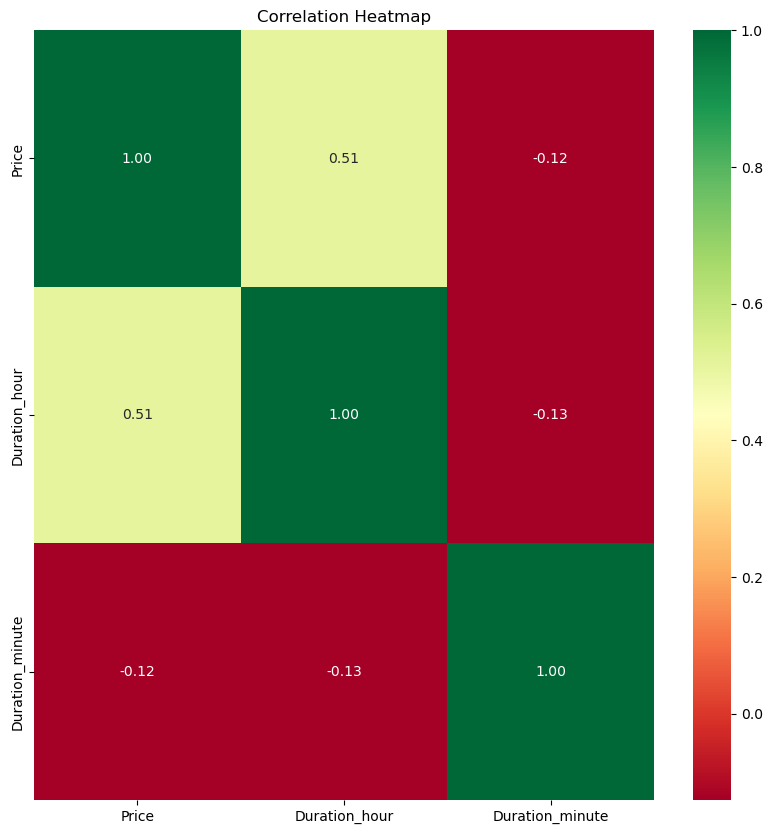

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used for correlation
numeric_columns = Flight.select_dtypes(include=['float64', 'int64'])

# Check if numeric_columns DataFrame is empty
if numeric_columns.empty:
    print("No numeric columns available for correlation.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()


### Fit model using Random Forest

In [110]:
pip install threadpoolctl


In [112]:
import threadpoolctl
print("threadpoolctl installed")



threadpoolctl installed


In [114]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=51)

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'Flight_Fare.csv'   # Path to the uploaded file
data = pd.read_csv('Flight_Fare.csv')

# Display basic info
print("Dataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Price'], axis=1)  # Replace 'Price' with your target column name
y = data['Price']  # Replace 'Price' with your target column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Evaluate the model
train_score = rfr.score(X_train, y_train)
test_score = rfr.score(X_test, y_test)

print("\nModel Evaluation:")
print(f"Training Score (R²): {train_score:.4f}")
print(f"Testing Score (R²): {test_score:.4f}")


Dataset Overview:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  

Missing values per column:
Airline            0
Date_of_Journey    0
Source     

In [118]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [120]:
pred = rfr.predict(X_test)

In [122]:
rfr.score(X_train , y_train)

0.9789178242024226

In [124]:
rfr.score(X_test , y_test)

0.8982104287981768

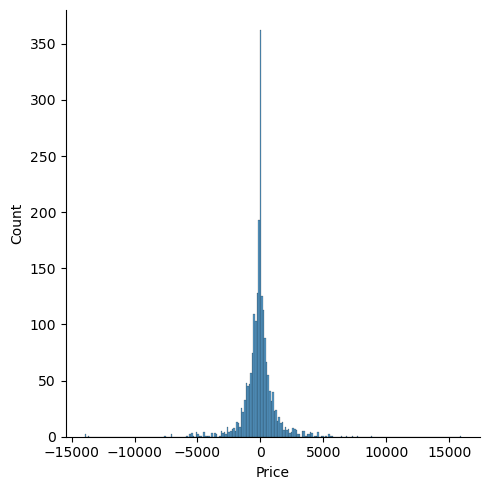

In [126]:
sns.displot(y_test - pred)

Text(0, 0.5, 'pred')

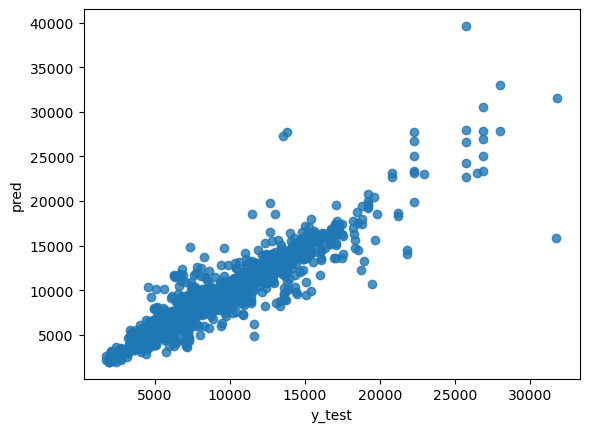

In [128]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [130]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 753.6302708068721
MSE: 1908177.3897844807
RMSE: 1381.3679414929538


In [132]:
metrics.r2_score(y_test,pred)

0.8982104287981768

### Hyperparameter Tuning

In [135]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
max_depth =  [int(x) for x in np.linspace(100, 2000, 10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2', 'auto', None]
random_search ={
'n_estimators' : n_estimators,
'max_depth': max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf,
'max_features': max_features,
}

random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [137]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [139]:
pip install --upgrade scikit-learn


In [141]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  51.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  50.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  51.7s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  51.4s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  51.3s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  57.1s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  57.4s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [147]:
rfr_random.best_params_

{'n_estimators': 1155,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 311}

In [161]:
prediction = rfr_random.predict(X_test)

C:\Users\User\AppData\Local\Temp\ipykernel_2056\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


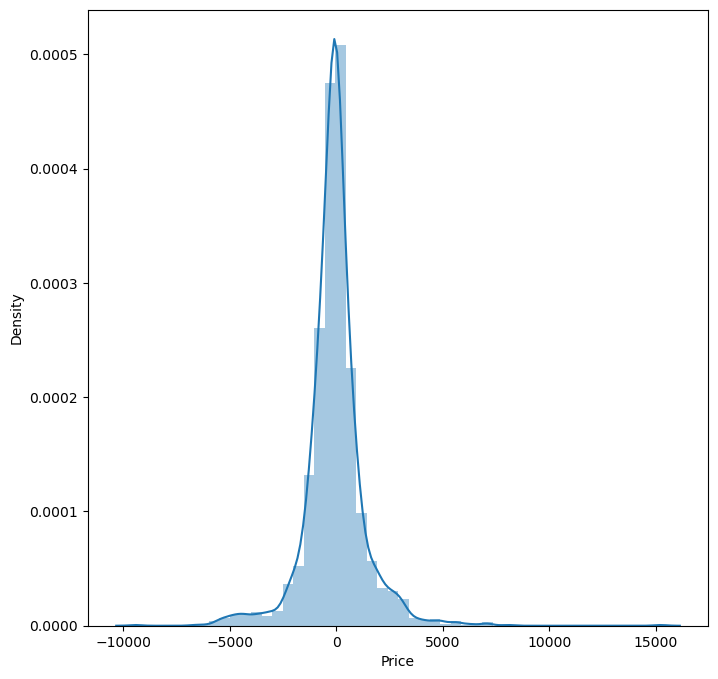

In [162]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

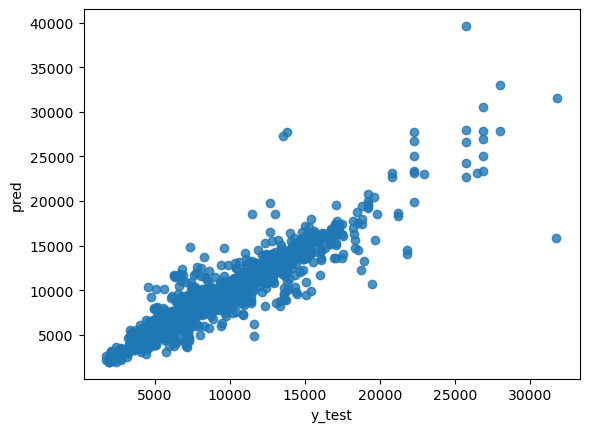

In [167]:
plt.scatter(y_test,pred,alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [171]:
print('MAE:' ,metrics.mean_absolute_error(y_test,prediction))
print('MSE:' ,metrics.mean_squared_error(y_test, prediction))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 866.9511404550664
MSE: 1955396.401987786
RMSE: 1398.3548912875394


In [173]:
metrics.r2_score(y_test,prediction)

0.8956915838362359

## save the model ##

In [199]:
import pickle
file = open('Flight-Fare-prediction.pkl','wb')
pickle.dump(rfr_random,file)

In [201]:
model = open('Flight-Fare-prediction.pkl','rb')
mod = pickle.load(model)

In [203]:
predicted_data = mod.predict(X_test)

In [205]:
metrics.r2_score(y_test,predicted_data)

0.8956915838362359